In [59]:
import numpy as np
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
path = "titanic"

In [61]:
train_data_ori = pd.read_csv(os.path.join(path, "train.csv"))

In [62]:
train_data_ori.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train_data_all = train_data_ori

In [64]:
stat_data = pd.DataFrame(train_data_all.isna().sum(axis=0), 
                         index=train_data_all.columns, 
                         columns=['count of lost number'])

In [65]:
stat_data['dtype'] = train_data_all.dtypes

In [66]:
stat_data

,count of lost number,dtype
PassengerId,0,int64
Survived,0,int64
Pclass,0,int64
Name,0,object
Sex,0,object
Age,177,float64
SibSp,0,int64
Parch,0,int64
Ticket,0,object
Fare,0,float64


In [67]:
train_data_all[train_data_all.Sex=='female'].Age.mean()

27.915708812260537

In [68]:
train_data_all[train_data_all.Sex=='male'].Age.mean()

30.72664459161148

In [69]:
fixed_female = train_data_all.loc[train_data_all['Sex'] == 'female'].Age.fillna(train_data_all[train_data_all.Sex=='female'].Age.mean())
fixed_male = train_data_all.loc[train_data_all['Sex'] == 'male'].Age.fillna(train_data_all[train_data_all.Sex=='male'].Age.mean())
train_data_all.loc[train_data_all['Sex'] == 'female', 'Age'] = fixed_female
train_data_all.loc[train_data_all['Sex'] == 'male', 'Age'] = fixed_male

In [70]:
train_data_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
train_label = train_data_all.Survived

In [72]:
train_data = train_data_all.drop(['Survived', 'Cabin'], axis=1)

In [73]:
train_data.Sex = np.where(train_data.Sex=='male', 1, 0)

In [74]:
train_data.head() # 1:male / 0:female

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [75]:
for cols in train_data:
    print("in category", cols, len(Counter(train_data[cols])), "kinds")

in category PassengerId 891 kinds
in category Pclass 3 kinds
in category Name 891 kinds
in category Sex 2 kinds
in category Age 90 kinds
in category SibSp 7 kinds
in category Parch 7 kinds
in category Ticket 681 kinds
in category Fare 248 kinds
in category Embarked 4 kinds


In [76]:
res = pd.DataFrame()
theresold = 0.95
for cols in train_data:
    counter_dict = Counter(train_data[cols])
    n = len(train_data)
    if len(counter_dict) < theresold * n:
        res[cols] = train_data[cols]
        if str(train_data[cols].dtypes) == 'object':
            it = 0
            counter_dict_index = dict()
            for k, v in Counter(train_data[cols]).items():
                counter_dict_index[k] = it
                it += 1
            res[cols].replace(counter_dict_index, inplace=True)
            del counter_dict_index
        res[cols] = (res[cols] - res[cols].mean())/res[cols].std()

In [77]:
res.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.826913,0.737281,-0.594398,0.432550,-0.473408,-1.555405,-0.502163,-0.568445
1,-1.565228,-1.354813,0.634962,0.432550,-0.473408,-1.550336,0.786404,0.975715
2,0.826913,-1.354813,-0.287058,-0.474279,-0.473408,-1.545267,-0.488580,-0.568445
3,-1.565228,-1.354813,0.404457,0.432550,-0.473408,-1.540199,0.420494,-0.568445
4,0.826913,0.737281,0.404457,-0.474279,-0.473408,-1.535130,-0.486064,-0.568445


In [78]:
train_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
5,6,3,"Moran, Mr. James",1,30.726645,0,0,330877,8.4583,Q
6,7,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,S
7,8,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C


In [79]:
def prefix(data, threshold=0.95):
    res = pd.DataFrame()
    for cols in data:
        counter_dict = Counter(data[cols])
        n = len(data)
        if len(counter_dict) < 0.95 * n:
            res[cols] = data[cols]
            if str(data[cols].dtypes) == 'object':
                it = 0
                counter_dict_index = dict()
                for k, v in Counter(data[cols]).items():
                    counter_dict_index[k] = it
                    it += 1
                res[cols].replace(counter_dict_index, inplace=True)
                del counter_dict_index
            res[cols] = (res[cols] - res[cols].mean())/res[cols].std()
    return res

In [80]:
train_data = prefix(train_data)

In [81]:
train_data.mean()

Pclass      1.679664e-16
Sex        -1.687140e-16
Age         4.813552e-15
SibSp       1.528893e-16
Parch      -3.638441e-17
Ticket      1.988682e-16
Fare        7.437622e-16
Embarked   -4.386066e-17
dtype: float64

In [82]:
train_data.std()

Pclass      1.0
Sex         1.0
Age         1.0
SibSp       1.0
Parch       1.0
Ticket      1.0
Fare        1.0
Embarked    1.0
dtype: float64

In [83]:
dd =Counter(train_data['Age'])
xx = []
yy = []
for k, v in dd.items():
    xx .append(k)
    yy.append(v/len(train_data))
yy = np.array(yy)[np.argsort(xx)]
xx = np.sort(xx)

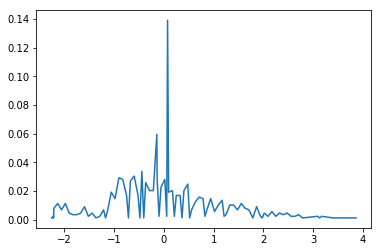

In [84]:
plt.plot(xx, yy)